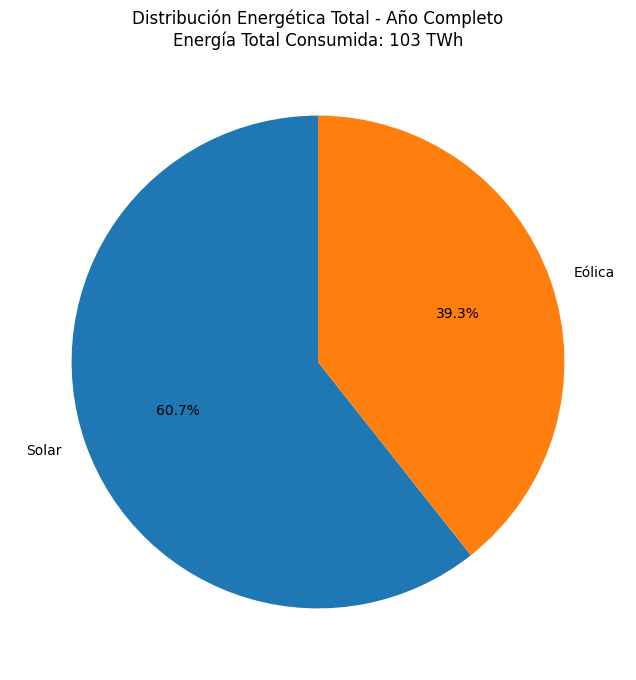

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# Cargar todos los archivos de los meses y sumar la energía total por tipo de energía
months_files = [
    'mes1.csv', 'mes2.csv', 'mes3.csv',
    'mes4.csv', 'mes5.csv', 'mes6.csv',
    'mes7.csv', 'mes8.csv', 'mes9.csv',
    'mes10.csv', 'mes11.csv', 'mes12.csv'
]

for i in range(len(months_files)):
    months_files[i] = "resultados/"+months_files[i]

total_energy_data = pd.DataFrame()

# Cargar todos los archivos y acumular los datos
for file_path in months_files:
    month_data = pd.read_csv(file_path, encoding='utf-8')
    total_energy_data = pd.concat([total_energy_data, month_data], ignore_index=True)

# Sumar la energía total por tipo de energía para todo el año
annual_energy_summary = total_energy_data.groupby('Tipo Energía')['Energía (MWh)'].sum()

# Sumar la energía total para todo el año
total_annual_energy = annual_energy_summary.sum()

# Crear un gráfico de torta para el total del año
plt.figure(figsize=(8, 8))
plt.pie(annual_energy_summary, labels=['Solar', 'Eólica'], autopct='%1.1f%%', startangle=90)
plt.title(f'Distribución Energética Total - Año Completo\nEnergía Total Consumida: {total_annual_energy/1000000:.0f} TWh')
plt.savefig('graficos/distribucion_energia.png')


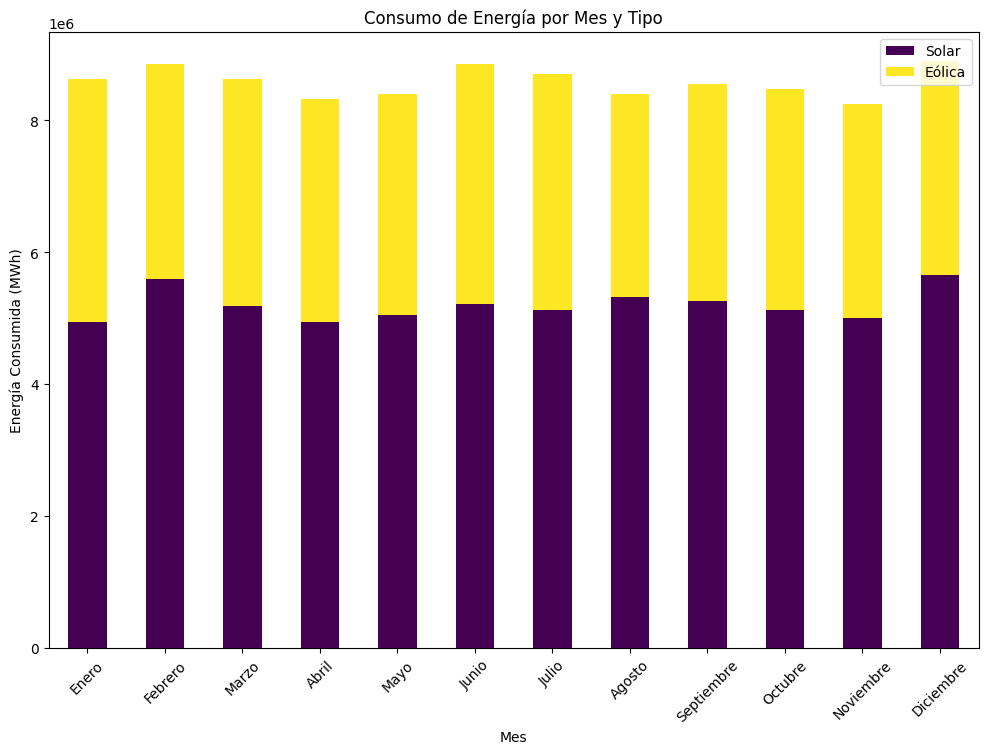

In [24]:
# Sumar la energía total por tipo de energía para cada mes y almacenar en un DataFrame
monthly_energy_summary = []

for month, file_path in enumerate(months_files, start=1):
    month_data = pd.read_csv(file_path, encoding='utf-8')
    monthly_sum = month_data.groupby('Tipo Energía')['Energía (MWh)'].sum()
    monthly_energy_summary.append(monthly_sum)

# Convertir la lista a un DataFrame
monthly_energy_summary_df = pd.DataFrame(monthly_energy_summary, index=range(1, 13)).fillna(0)

# Crear un gráfico de barras apiladas
monthly_energy_summary_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Mes')
plt.ylabel('Energía Consumida (MWh)')
plt.title('Consumo de Energía por Mes y Tipo')
plt.legend(['Solar', 'Eólica'])
plt.xticks(ticks=range(0, 12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.savefig('graficos/consumo_energia_mes.png')


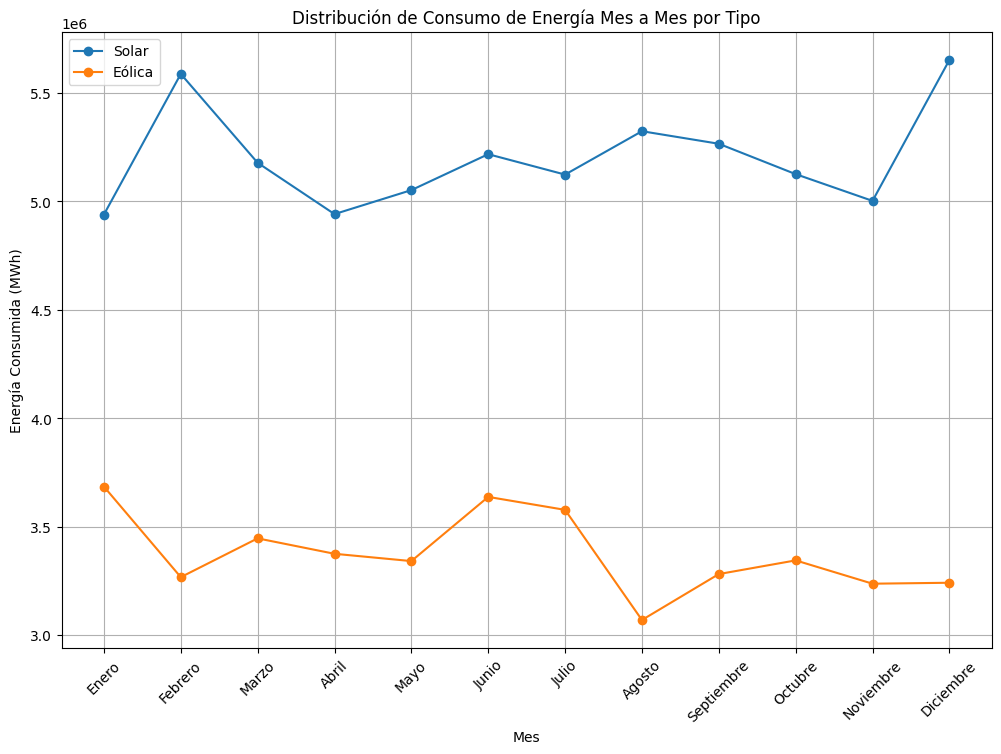

In [25]:
monthly_energy_summary = []

for month, file_path in enumerate(months_files, start=1):
    month_data = pd.read_csv(file_path, encoding='utf-8')
    monthly_sum = month_data.groupby('Tipo Energía')['Energía (MWh)'].sum()
    monthly_energy_summary.append(monthly_sum)

# Convertir la lista a un DataFrame
monthly_energy_summary_df = pd.DataFrame(monthly_energy_summary, index=range(1, 13)).fillna(0)

# Crear un gráfico de puntos
plt.figure(figsize=(12, 8))
for tipo in monthly_energy_summary_df.columns:
    plt.plot(monthly_energy_summary_df.index, monthly_energy_summary_df[tipo], marker='o', linestyle='-', label=f'Tipo {tipo}')
    
plt.xlabel('Mes')
plt.ylabel('Energía Consumida (MWh)')
plt.title('Distribución de Consumo de Energía Mes a Mes por Tipo')
plt.legend(['Solar', 'Eólica'])
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.grid(True)
plt.savefig('graficos/consumo_energia_mes_puntos.png')


Tipo Energía           1           2
Región                              
Norte Chico   17599202.0         0.0
Norte Grande  20608475.0   2062525.0
Sur                  0.0  21065360.0
Zona Central  24208065.0  17366873.0


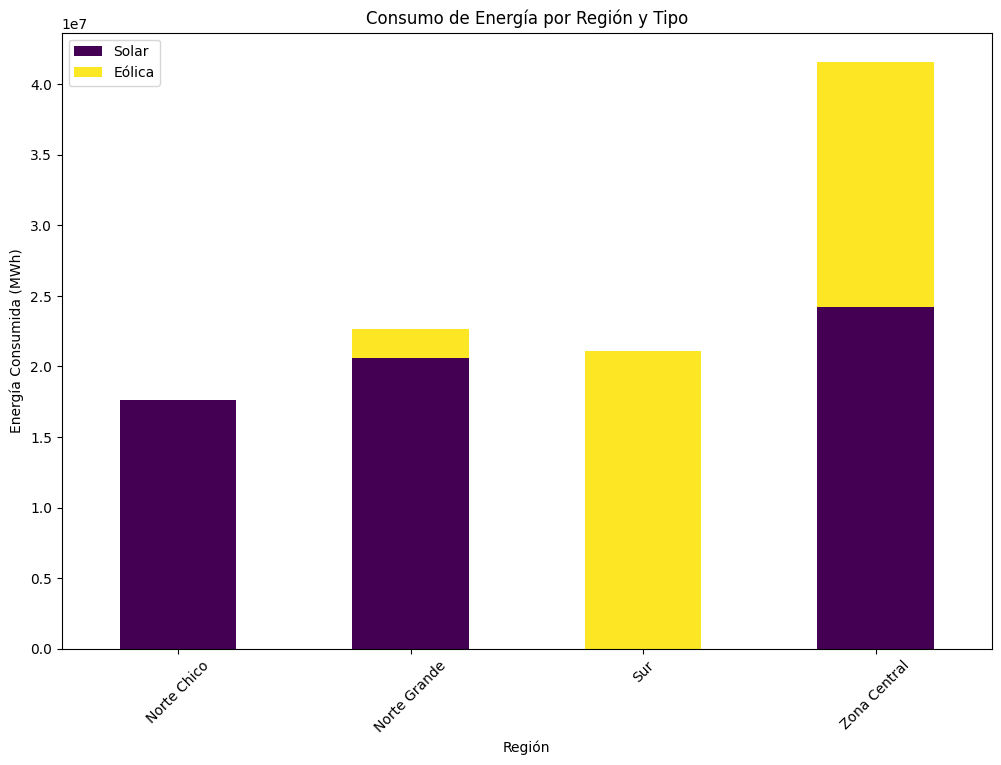

In [26]:
import pandas as pd

# Función para clasificar la región basada en la ubicación
def classify_region(ubicacion):
    if 0 <= ubicacion < 10:
        return 'Norte Grande'
    elif 10 <= ubicacion < 20:
        return 'Norte Chico'
    elif 20 <= ubicacion < 40:
        return 'Zona Central'
    elif 40 <= ubicacion < 51:
        return 'Sur'
    else:
        return 'Desconocido'

# Crear una nueva columna que identifique la región basada en la ubicación
total_energy_data['Región'] = total_energy_data['Ubicación'].apply(classify_region)

# Sumar la energía total por tipo de energía y región
region_energy_summary = total_energy_data.groupby(['Región', 'Tipo Energía'])['Energía (MWh)'].sum().unstack().fillna(0)

# Mostrar la tabla resumen
print(region_energy_summary)


import matplotlib.pyplot as plt

# Crear un gráfico de barras apiladas
region_energy_summary.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Región')
plt.ylabel('Energía Consumida (MWh)')
plt.title('Consumo de Energía por Región y Tipo')
plt.legend(['Solar', 'Eólica'])
plt.xticks(rotation=45)
plt.savefig('graficos/consumo_energia_region_tipo.png')
